## 梯度下降

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plot_x = np.linspace(-1,6,141)
plot_y = (plot_x-2.5)**2-1
plt.plot(plot_x,plot_y)
plt.show()

In [2]:
def dJ(theta):#求导
    return 2*(theta-2.5)

def J(theta):#损失函数
    return (theta-2.5)**2-1

In [3]:
def gradient_descent(initial_theta,eta,n_iters = 1e4,epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        old_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        if(abs(J(theta)-J(old_theta))< epsilon):
            break
        i_iter += 1
        
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
    plt.show()

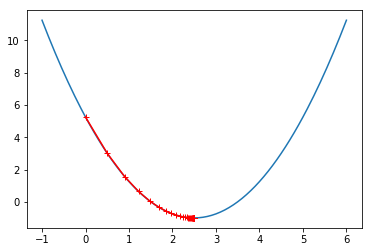

46

In [4]:
theta_history = []
gradient_descent(0,0.1)
plot_theta_history()
len(theta_history)

## 在线性回归中使用梯度下降法

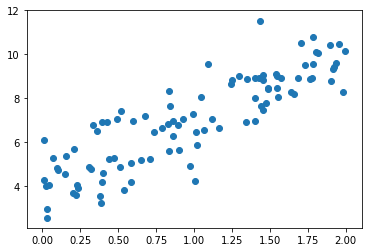

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = 2*np.random.random(size=100)
y = X*3. + 4. + np.random.normal(size=100)#均值为0，方差为1的正态分布随机数
X = X.reshape(-1,1)
plt.scatter(X,y)
plt.show()

## 批量梯度下降法

In [6]:
def dJ(theta,X_b,y):#求导
    res = np.empty(len(theta))#开辟一个空间存MSE(y,hat(y))
    res[0] = np.sum(X_b.dot(theta)-y)#对第0项单独处理
    for i in range(1,len(theta)):#其他的n项
        res[i] = (X_b.dot(theta)-y).dot(X_b[:,i])
    return res * 2/len(X_b) # *2/m 

def J(theta,X_b,y):#损失函数
    try:
        return np.sum((y-X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

#梯度下降算法
def gradient_descent(X_b,y,initial_theta,eta,n_iters = 1e4,epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:#循环终止条件，循环次数
        gradient = dJ(theta,X_b,y)
        old_theta = theta
        theta = theta - eta*gradient
        #循环终止条件，学习率过小
        if(abs(J(theta,X_b,y)-J(old_theta,X_b,y))< epsilon):
            break
        i_iter += 1
    
    return theta

In [7]:
X_b = np.hstack([np.ones((len(X),1)),X.reshape(-1,1)])#对x加一列,y值为原始的y值
initial_theta = np.zeros(X_b.shape[1])#theta初始值为0的向量，列数为特征数+1
eta = 0.01
theta = gradient_descent(X_b,y,initial_theta,eta)
theta

array([4.02145786, 3.00706277])

### 使用我们自己封装的梯度下降法fit回归模型
```python
def fit_gd(self,X_train,y_train,eta=0.01,n_iter=1e4):
        """利用X_train,y_train ,设置步长eta，最大循环次数n_iters使用梯度下降 fit """
    
        assert X_train.shape[0] == y_train.shape[0],\
            "the size of X_train must be equal to the size of y_train"

        def dJ(theta, X_b, y):  # 求导{计算梯度}
            #res = np.empty(len(theta))  # 开辟一个空间存MSE(y,hat(y))
            #res[0] = np.sum(X_b.dot(theta) - y)  # 对第0项单独处理
            #for i in range(1, len(theta)):  # 其他的n项
            #    res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
            #return res * 2 / len(X_b)  # *2/m
            return X_b.T.dot(X_b.dot(theta)-y) * 2./len(X_b)

        def J(theta, X_b, y):  # 计算损失函数
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

        # 梯度下降算法
        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                old_theta = theta
                theta = theta - eta * gradient

                if (abs(J(theta, X_b, y) - J(old_theta, X_b, y)) < epsilon):
                    break
                cur_iter += 1

            return theta
        #对X_train加一列,变成X_b，y值为原始的y值
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train]) 
        # initial_theta初始值为0的向量，列数为特征数+1
        initial_theta = np.zeros(X_b.shape[1])
        #使用梯度下降法对theta进行计算
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
```

In [8]:
from ML.LinearRegression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)
lin_reg.coef_,lin_reg.interception_

(array([3.00706277]), 4.021457858204859)

## 使用真实数据

In [9]:
#导入真实数据
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50.0]
y = y[y < 50.0]
#使用我们自己封装的split类
from ML.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,seed = 666)
#数据归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()#实例化
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)#获得归一化后的结果
X_test_standard = standardScaler.transform(X_test)
#使用梯度下降法
from ML.LinearRegression import LinearRegression
lin_reg_r = LinearRegression()
lin_reg_r.fit_gd(X_train_standard,y_train)
#pridict
lin_reg_r.score(X_test_standard,y_test)

0.8129880620122235

### 梯度下降法的优势

In [10]:
#生成随机数据
m = 1000
n = 5000
big_X = np.random.normal(size=(m,n))
#生成y值
true_theta = np.random.uniform(0,100,size=n+1)#theta的真值
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0.,10.,size=m)#x*k+b+噪音

In [11]:
#使用正规方程fit
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X,big_y)

Wall time: 12.8 s


LinearRegression()

In [12]:
#使用GDfit
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X,big_y)

Wall time: 6.24 s


LinearRegression()

#### 注：可见，我们的维度越多，GD效率更高，但是例子中，样本数小于特征数，但是在真实中样本数是可能多于特征数的，然而GD要对每一个样本进行梯度下降，当样本数多时，效率可能更低
### 批量梯度下降法（BGD）改进：随机梯度下降法（SGD）{用精度换取效率}

## 随机梯度下降法

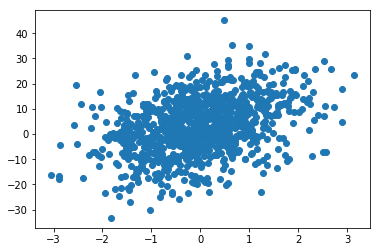

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#生成随机数据
m = 1000
sgd_X = np.random.normal(size=m)
sgd_X = sgd_X.reshape(-1,1)
sgd_y = 4.*sgd_X[:,0] +3.+np.random.normal(0.,10.,size=m)
plt.scatter(sgd_X,sgd_y)
plt.show()

In [14]:
%%time
sgd_reg2 = LinearRegression()
sgd_reg2.fit_gd(sgd_X,sgd_y)
sgd_reg2.coef_,sgd_reg2.interception_

Wall time: 33.1 ms


### 使用随机梯度下降法
#### def J(): `np.sum((y - X_b.dot(theta)) ** 2) / len(y)`

= $\frac{1}{m}\sum_{i=1}^m(y^{(i)} - X_b^{(i)}\theta)^2$ 
=  $\frac{1}{m}\sum_{i=1}^m(y^{(i)} - \bar{y}^{(i)})^2$=$MSE(y,\hat{y})$

#### def dJ(): =对j这个向量的每一个元素求偏导:

   1.$▽J(\theta)=
   \begin{pmatrix} 
   ▽J(\theta_0)\\
   ▽J(\theta_1)\\
   ▽J(\theta_2)\\
   ...\\
   ▽J(\theta_n)
   \end{pmatrix} \quad$
   = 
   $\frac{2}{m}\begin{pmatrix} 
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)}) \\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)})·X_1^{(i)}\\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)})·X_2^{(i)}\\
   ...\\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)}·X_n^{(i)}) 
   \end{pmatrix} \quad$
   
   `res[0] = np.sum(X_b.dot(theta) - y)  # 对第0项单独处理
for i in range(1, len(theta)):  # 其他的n项
   res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
   return res * 2 / len(X_b)`
   
       
   2.$▽J(\theta)=\frac{2}{m}·\begin{pmatrix} 
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)})·X_0^{(i)} \\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)})·X_1^{(i)}\\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)})·X_2^{(i)}\\
   ...\\
   \sum_{i=1}^m(X_b^{(i)}\theta - y^{(i)}·X_n^{(i)}) 
   \end{pmatrix} \quad = 
   \frac{2}{m}·X_b^T·(X_b\theta-y)$
   ` X_b.T.dot(X_b.dot(theta)-y) * 2./len(X_b)`
   
##### 在随机梯度下降法中，用随机的方式，每次只取出一个元素，则不需要$\sum$和除以m
 $\begin{pmatrix} 
   (X_b^{(i)}\theta - y^{(i)})·X_0^{(i)} \\
   (X_b^{(i)}\theta - y^{(i)})·X_1^{(i)}\\
   (X_b^{(i)}\theta - y^{(i)})·X_2^{(i)}\\
   ...\\
   (X_b^{(i)}\theta - y^{(i)}·X_n^{(i)}) 
   \end{pmatrix} \quad = 
   2·(X_b^{(i)})^T·(X_b^{(i)}\theta-y^{(i)})$
   
   其中，学习率在随机梯度下降法中：$\eta = \frac{t_0}{i_{iters}+t_1}${模拟退火}

In [15]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) *2

In [16]:
def sgd(X_b,y,initial_theta,n_iters):
    t0 = 5
    t1 = 50
    #i_iter = t0/(n_iters+t1)
    #随机梯度下降法中的iter,学习率
    def learning_rate(t):
        return t0/(t+t1)
    theta = initial_theta
    for cur_iter in range(n_iters):#循环条件，循环次数
        rand_i = np.random.randint(len(X_b))#随机获取一个样本的索引
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])#把随机取出来的样本传给dj_sgd
        theta = theta - learning_rate(cur_iter)*gradient#新的theta
    return theta

In [17]:
X_b = np.hstack([np.ones((len(sgd_X),1)),sgd_X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,sgd_y,initial_theta,n_iters=len(X_b)//3)#我们的随机梯度下降法只需要随机样本总数的1/3就好了
print(theta)

[1.99222436 4.91772845]


### 封装我们的随机梯度下降法
```python
    def fit_sgd(self,X_train,y_train,n_iters=5,t0=5,t1=50):
        assert X_train.shape[0] == y_train.shape[0],\
            "the size of X_train must be equal to the size of y_train"
        assert n_iters > 1,"fit times must >1"

        def dJ_sgd(theta,X_b_i,y_i):
            return X_b_i * (X_b_i.dot(theta)-y_i) * 2.

        def sgd(X_b,y,initial_theta,n_iters,t0=5,t1=50):
            def learning_rate(t):
                return t0 / (t+t1)
            theta = initial_theta
            m = len(X_b)
            for cur_iter in range(n_iters * m):
                # 超
                # 级
                # 重
                # 要
                # 只用一层循环无法保证，样本都被参照过(应该把样本看5遍)
                # 把样本先乱序排列,可以保证样本都被参照过
                indexes= np.random.permutation(m)
                X_b_new = X_b[indexes]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])#计算梯度
                    theta = theta - learning_rate(cur_iter*m + i) * gradient
                    #learning_rate(cur_iter*m + i) ，learning_rate中应该是，当前遍历的次数
            return theta

        X_b = np.hstack([np.ones((len(X_train),1)),X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b,y_train,initial_theta,n_iters,t0,t1)

        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1]
        return self

```

In [18]:
from ML.LinearRegression import LinearRegression
lr_sgd = LinearRegression()
lr_sgd.fit_sgd(sgd_X,sgd_y,n_iters = 2)
lr_sgd.coef_,lr_sgd.interception_

(array([4.15812894]), 3.150699049394285)

### 使用真实数据


In [19]:
#导入真实数据
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50.0]
y = y[y < 50.0]
#使用我们自己封装的split类
from ML.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,seed = 666)

#数据归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()#实例化
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)#获得归一化后的结果
X_test_standard = standardScaler.transform(X_test)
#使用我们封装的随机梯度下降法
from ML.LinearRegression import LinearRegression
lr_sgd_2 = LinearRegression()
lr_sgd_2.fit_sgd(X_train_standard,y_train,n_iters=2)
lr_sgd_2.score(X_test_standard,y_test)

0.8129727839268047

### 使用sklearn中的SGD


In [20]:
from sklearn.linear_model import SGDRegressor
sgd_rgr = SGDRegressor()
sgd_rgr.fit(X_train_standard,y_train)
sgd_rgr.score(X_test_standard,y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7993532403889403

## 梯度的调试

#### 模拟样本：

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#10个特征：
np.random.seed(666)
X = np.random.random(size = (1000,10))#1000个10维的样本
#真正的10个theta
true_theta = np.arange(1,12,dtype=float)
#X和y
X_b = np.hstack([np.ones((len(X),1)),X])
y = X_b.dot(true_theta)+np.random.normal(size=1000)
#true_theta
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
#我们的梯度下降法
def J(theta, X_b, y):  # 计算损失函数
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')

In [23]:
#我们推导出来的求导结果{划重点，推导的，不能复用}
def dJ_math(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta)-y) * 2./len(X_b)

In [24]:
#我们用来调试的方法{可以复用}
def dJ_debug(theta,X_b,y,epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_minus = theta.copy()
        theta_plus[i] +=epsilon
        theta_minus[i] -=epsilon
        res[i] = (J(theta_plus,X_b,y) - J(theta_minus,X_b,y)) / (2*epsilon)
    return res


In [25]:
# 验证函数，批量梯度下降法
def gradient_descent(dJ,X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                old_theta = theta
                theta = theta - eta * gradient

                if (abs(J(theta, X_b, y) - J(old_theta, X_b, y)) < epsilon):
                    break
                cur_iter += 1

            return theta

### 验证

In [26]:
X_b = np.hstack([np.ones((len(X),1)),X])#对x加一列,y值为原始的y值
initial_theta = np.zeros(X_b.shape[1])#theta初始值为0的向量，列数为特征数+1
eta = 0.01
theta_debug = gradient_descent(dJ_debug,X_b,y,initial_theta,eta)
theta_math = gradient_descent(dJ_math,X_b,y,initial_theta,eta)
theta_debug,theta_math

(array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]),
 array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
         5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
        10.90529198]))

# 小批量梯度下降法{mini-Batch GD}
是BGD和SGD的综合
确切的说，是SGD，每次看K个样本的结果，K是一个新的超参数


## 随机的意义
1.跳出局部最优解，更快的运行速度